# RL and Online ML for Energy Market Token Minting
The use of Online Machine Learning and/or Reinforcement Learning to predict the next best frequency of token minting for Energy market tokens.

# The concepts and definitions
In this project we will have the following concepts:
1. **Token**: A token is a digital asset that can be used to represent ownership of a resource. In this project, the token is a digital asset that represents the ownership of a certain amount of energy.
2. **Token minting**: Token minting is the process of creating new tokens. In this project, token minting is the process of creating new tokens to represent the ownership of a certain amount of energy.
3. **ERC20 tokens**: ERC-20 is a widely-used standard on the Ethereum blockchain for creating fungible tokens with consistent properties, facilitating their seamless exchange and integration into various applications.
4. **ERC721 tokens**: ERC-721 is a free, open standard that describes how to build non-fungible or unique tokens on the Ethereum blockchain. While most tokens are fungible (every token is the same as every other token), ERC-721 tokens are all unique.
4. **ERC1155 tokens**: ERC-1155 is a new standard that is an extension of ERC-721. It allows for a single smart contract to govern an infinite number of tokens. In this project, ERC1155 tokens are tokens that represent the ownership of a certain amount of energy.


**Attention: the following concepts and definitions are project specific**



5. **ERC1155 carbon credit**: ERC1155 carbon credit is a token that represents the ownership of a credit issued by an organization to approve the carbon or equivalent gas offset from the earth.
6. **ERC20 carbon credt**: ERC20 carbon credit is a token that is issued as a reward to someone who has made effort on reducing the carbon or equivalent gas emission from the earth.

# The problem
The problem is about ERC115 carbon credit investment pool. The investment pool is a pool of ERC1155 carbon credit tokens that in reward of the investment of other parties to the pool, will give them a ERC20 carbon credit token. This is useful for the following reasons:
1. The ERC20 then can be used to buy other goods and services.
2. The holder of the pool may gather ERC115 credits to fulfil the requirements of governments and other organizations.
3. In exchange of the ERC115 be used by the pool holder, the pool holder will give the investor ERC20 token.

We want to find the best frequency of minting ERC20 tokens to give to the investors. The frequency of minting is important because:
1. If the frequency is too high, the pool holder will lose money because of the minting cost and also the ERC20 token's value would be reduced.
2. If the frequency is too low, the pool holder will lose investors because of the low reward.

# The solution
The solution is to use Online Machine Learning and/or Reinforcement Learning to predict the next best frequency of token minting for Energy market tokens.

## No dataset
Pay attention that this project cannot have any dataset because it is a real-time project. The data is generated by the system in this project.


# Let's get our hands on code.



In [101]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
import scipy

## Definitions
Each ERC1555 Energy token has the following properties:
1. **Token ID**: The ID of the token.
2. **Standard**: The organization of the credit issuer.
3. **Time frame**: The start and end time of  the credit.
4. **Company**: The company that the credit is issued for.
5. **Technology**: The technology that the credit is issued for.
6. **Carbon value**: The amount of the carbon offset for this credit.
7. **Carbon Type**: The type of the carbon that the credit is issued for.
8. **Registry Address**: The address of the registry that the credit is issued for.
9. **Issuance Date**: The date that the credit is issued.
10. **Energy (KWh)**: The amount of energy that the credit is issued for.
11. **Owner**: The c

What we care for, right now for this project are **Standard**, **Carbon Value**, **Carbon Type**, **Issuance Year**, **Owner**.


In [102]:
class ERC1155EnergyToken:
    def __init__(self, token_id: int, standard: str, carbon_value: int, carbon_type: str, owner: int,
                 issuance_year: int):
        self.token_id = token_id
        self.standard = standard
        self.carbon_value = carbon_value
        self.carbon_type = carbon_type
        self.owner = owner
        self.issuance_year = issuance_year

    def __str__(self) -> str:
        return f"ERC1155 Energy Token: {self.token_id}, Standard: {self.standard}, Carbon Value: {self.carbon_value}, Carbon Type: {self.carbon_type}, Owner: {self.owner}, Issuance Year: {self.issuance_year}"

There are some ERC1155 Energy tokens that are more valuable inherently. For example, the ERC1155 Energy tokens that are issued for the year 2020 are more valuable than ones in 2019.
So let's create some rules for this purpose:
1. **Standard**: To make the track of the organizations of issuing credits based on their reputation we need to have a dictionary of the organizations and their reputation. The reputation is an integer. The higher the reputation, the more valuable the credit is.
2. **Carbon Value**: The higher the carbon value, the more valuable the credit is.
3. **Carbon Type**: To make the track of the carbon types of issuing credits based on the value of the carbon type is offering we need to have a dictionary of the carbon types and their value. The value is an integer. The higher the value, the more valuable the credit is.
4. **Issuance Year**: The higher the issuance year, the more valuable the credit is.

In [103]:
# Dictionary for the reputation of the organizations (standards)
standard_reputation = {
    "standard1": 1000,
    "standard2": 2000,
    "standard3": 3000,
    # Add more standards as needed
}

# Dictionary for the value of the carbon types
carbon_type_values = {
    "type1": 1000,
    "type2": 2000,
    "type3": 3000,
    # Add more carbon types as needed
}

## The pools definitions
The pools are ERC1155 Energy tokens that are grouped together with the same properties. There's an input method for each pool, the method will accept only the corresponding tokens.
There's a method to get the current price through an API call.
There's a method to calculate the current frequency of minting based on the current price and the current frequency of minting and also current frequency of investment. The frequency has the unit of minting per hour. But for the sake of simulation, we can consider the unit of minting amount per some seconds.
There's another method to calculate the amount of the ERC20 tokens for a specific owner.
There's another dictionary needed to handle the weights of three elements that define the inherent value of the ERC1155 Energy tokens. The elements are **Standard**, **Carbon Type**, **Issuance Year** (year-1980).
So let's create the weights dictionary.

In [104]:
# Dictionary for the weights of the elements that define the inherent value of the ERC1155 Energy tokens
weights = {
    "standard": 0.5,
    "carbon_type": 0.3,
    "issuance_year": 0.2
}

In [105]:
from typing import Dict, List, Tuple

frequency_time_unit = 1  # seconds


class Pool():
    def __init__(self, standard: str, carbon_type: str, issuance_year: int):
        self.standard = standard
        self.carbon_type = carbon_type
        self.issuance_year = issuance_year
        self.ownerToTokens: Dict[int, List[Tuple[time, ERC1155EnergyToken]]] = {}
        self.investments: List[Tuple[time, ERC1155EnergyToken]] = []
        self.prices: List[int] = []
        # there's another property for the pool that scales the frequency of minting based on the type of the accepted ERC1155 Energy tokens
        self.inherent_value = weights["standard"] * standard_reputation[self.standard] + weights["carbon_type"] * \
                              carbon_type_values[self.carbon_type] + weights["issuance_year"] * (
                                      self.issuance_year - 1980)
        self.current_frequency = 0
        self.raw_frequency = 0
        self.last_withdrawals_calculate: time = datetime.datetime.now()
        self.owners_withdrawals: Dict[int, int] = {}

    def __str__(self) -> str:
        return f"Pool: Standard: {self.standard}, Carbon Type: {self.carbon_type}, Issuance Year: {self.issuance_year}"

    def invest(self, token: ERC1155EnergyToken):
        if token.standard == self.standard and token.carbon_type == self.carbon_type and token.issuance_year == self.issuance_year:
            self.ownerToTokens[token.owner].append((datetime.datetime.now(), token))
            self.investments.append((datetime.datetime.now(), token))
            self.calculate_current_frequency()
            self.owners_withdrawals[token.owner] = 0
        else:
            raise Exception("The token is not valid for this pool")

    def get_current_price(self):
        # This is an API call
        price = 100
        self.prices.append(price)

        return price

    def calculate_current_frequency(self):
        # calculate the current frequency of minting based on the current price and the current frequency of minting and also current frequency of investment
        raw_frequency = self.get_raw_frequency()
        self.current_frequency = raw_frequency * self.inherent_value
        self.update_withdrawals_amounts()
        return self.current_frequency

    def update_withdrawals_amounts(self):
        current_frequency = self.current_frequency
        current_amount_for_each_value = current_frequency * (
                datetime.datetime.now() - self.last_withdrawals_calculate) / frequency_time_unit
        for owner in self.ownerToTokens.keys():
            self.owners_withdrawals[owner] += current_amount_for_each_value * self.calculate_amount_of_erc1155_tokens(
                owner)
        self.last_withdrawals_calculate = datetime.datetime.now()

    def get_raw_frequency(self) -> int:
        return self.raw_frequency

    def calculate_amount_of_erc1155_tokens(self, owner: int) -> int:
        sum = 0
        for _, token in self.ownerToTokens[owner]:
            sum += token.carbon_value
        return sum

    def withdraw_benefit(self, owner: int):
        amount = self.owners_withdrawals[owner]
        self.owners_withdrawals[owner] = 0
        return amount

## The simulation stuff
We need to simulate the ERC1155 Energy tokens and the ERC20 Energy tokens. We need to simulate the investment process and the minting process.
We need two types of diagrams:
1. The diagram of the ERC1155 investment amount by time.
2. The diagram of the price of the ERC20 token by time.

The result would be the diagram of frequency of minting by time.

In [106]:
class SimulationData:
    def __init__(self, prices: List[int], investments: List[Tuple[time, ERC1155EnergyToken]]):
        self.prices = prices
        self.investments = investments

    def __str__(self) -> str:
        return f"Simulation Data: Prices: {self.prices}, Investments: {self.investments}"

    def get_prices(self):
        return self.prices

    def get_investments(self):
        return self.investments


Let's use simple charts and classical chart patterns to simulate the price of the ERC20 token.
We will have the following patterns:
+ **Linear increase**
+ **Linear decrease**
+ **Head and Shoulders**
+ **Double Top**
+ **Double Bottom**
+ **Triple Top**
+ **Triple Bottom**
+ **Rounding Bottom**
+ **Rounding Top**
+ **Cup and Handle**
+ **Reaching Center Triangle**
+ **Ascending Triangle**
+ **Descending Triangle**

Let's create a dictionary for the patterns and their corresponding list of prices.

In [107]:
patterns = {}

What we are going to do is to create a function to generate the patterns with the given slopes. The slopes are given as a list of integers. The lines are connected to each other with the given slopes.

In [108]:
def generate_pattern(slopes: List[int], initial_price: int, time: int) -> List[int]:
    prices = [initial_price]
    n = len(slopes)
    part_time = time // n
    remaining_time = time % n
    for i in range(n):
        for j in range(part_time):
            prices.append(prices[-1] + slopes[i])
        if i < remaining_time:
            prices.append(prices[-1] + slopes[i])
    if min(prices) < 0:
        prices = [i - min(prices) for i in prices]
    return prices


generate_pattern([1], 100, 1000)

[100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 239,
 240,
 241,
 242,
 243,
 244,
 245,
 246,
 247,
 248,
 249,
 250,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 261,
 262,
 263,
 264,
 265,
 266

Let's visualize the linear increase pattern.

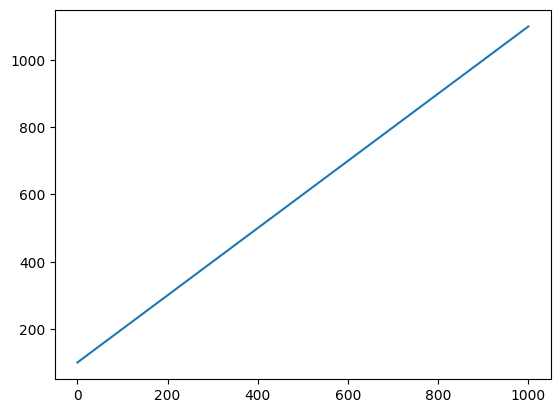

In [109]:
linear_increase_pattern = generate_pattern([1], 100, 1000)
plt.plot(linear_increase_pattern)

Let's visualize the linear decrease pattern.

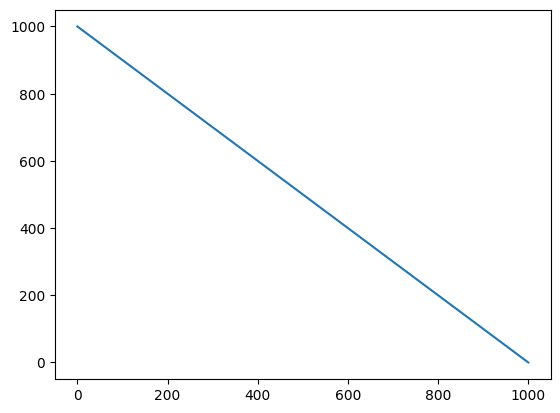

In [110]:
linear_decrease_pattern = generate_pattern([-1], 100, 1000)
plt.plot(linear_decrease_pattern)

Let's visualize the head and shoulders pattern.

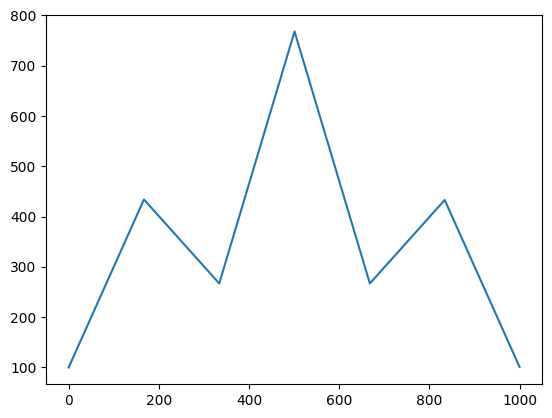

In [111]:
head_and_shoulders_slopes = [2, -1, 3, -3, 1, -2]
head_and_shoulders_pattern = generate_pattern(head_and_shoulders_slopes, 100, 1000)
plt.plot(head_and_shoulders_pattern)

Double top pattern

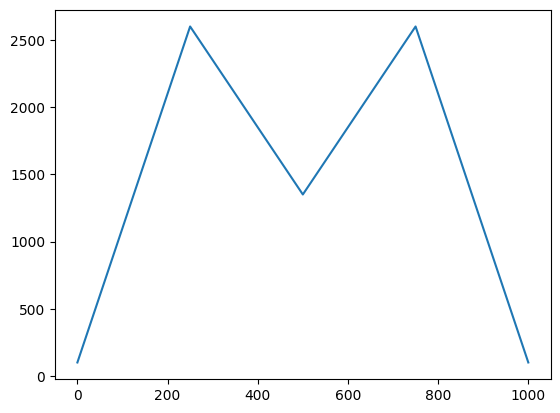

In [112]:
double_tap_slopes = [10, -5, 5, -10]
double_top_pattern = generate_pattern(double_tap_slopes, 100, 1000)
plt.plot(double_top_pattern)

Double bottom pattern

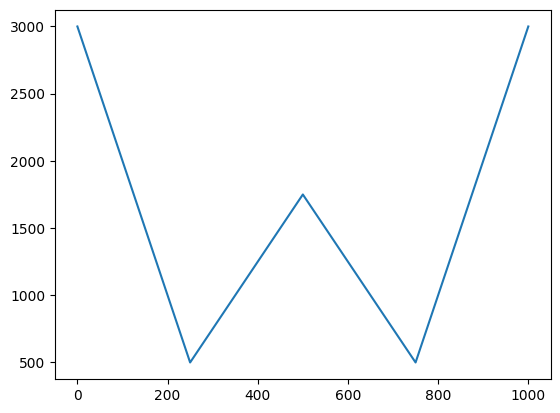

In [113]:
double_bottom_slopes = [-10, 5, -5, 10]
double_bottom_pattern = generate_pattern(double_bottom_slopes, 3000, 1000)
plt.plot(double_bottom_pattern)

Triple top pattern

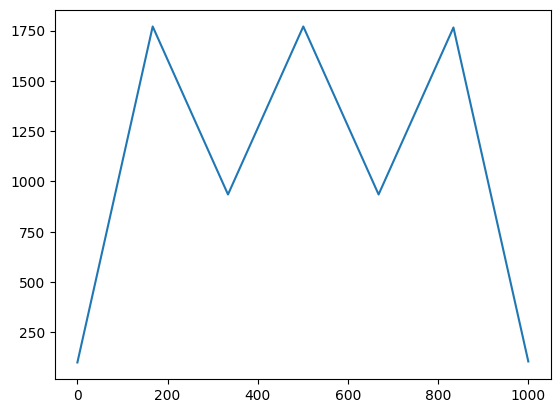

In [114]:
triple_top_slopes = [10, -5, 5, -5, 5, -10]
triple_top_pattern = generate_pattern(triple_top_slopes, 100, 1000)
plt.plot(triple_top_pattern)

Triple bottom pattern

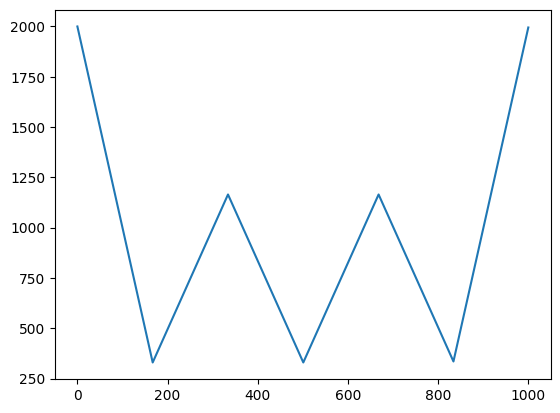

In [115]:
triple_bottom_slopes = [-10, 5, -5, 5, -5, 10]
triple_bottom_pattern = generate_pattern(triple_bottom_slopes, 2000, 1000)
plt.plot(triple_bottom_pattern)

Rounding bottom pattern

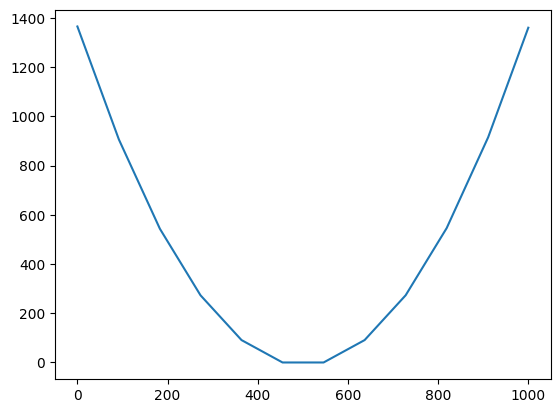

In [116]:
rounding_bottom_slopes = [-5 + i for i in range(11)]
rounding_bottom_pattern = generate_pattern(rounding_bottom_slopes, 1300, 1000)
plt.plot(rounding_bottom_pattern)

Rounding top pattern

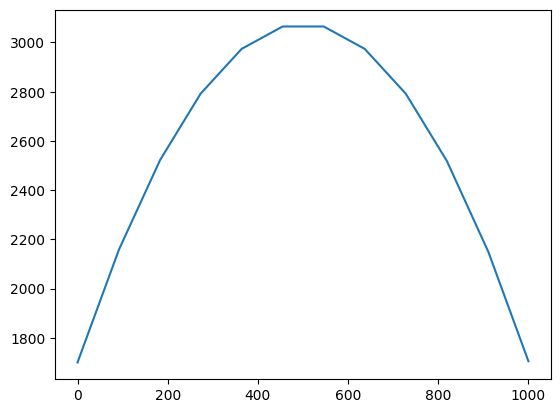

In [117]:
rounding_top_slopes = [5 - i for i in range(11)]
rounding_top_pattern = generate_pattern(rounding_top_slopes, 1700, 1000)
plt.plot(rounding_top_pattern)

Cup and handle pattern

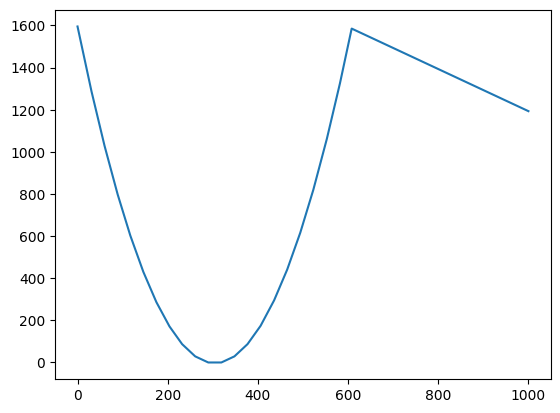

In [118]:
cup_and_handle_slopes = [-10 + 1 * i for i in range(21)] + [-1 for i in range(14)]
cup_and_handle_pattern = generate_pattern(cup_and_handle_slopes, 1500, 1000)
plt.plot(cup_and_handle_pattern)

Reaching center triangle

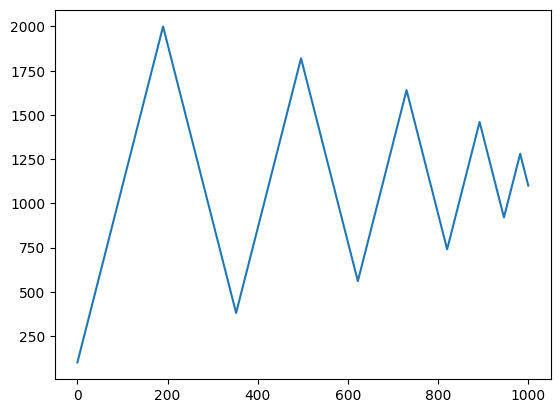

In [119]:
reaching_center_slopes = []

for i in range(10):
    for j in range(10 - i):
        reaching_center_slopes.append(10 * (-1) ** i)

reaching_center_triangle_pattern = generate_pattern(reaching_center_slopes, 100, 1000)
plt.plot(reaching_center_triangle_pattern)

Ascending triangle pattern

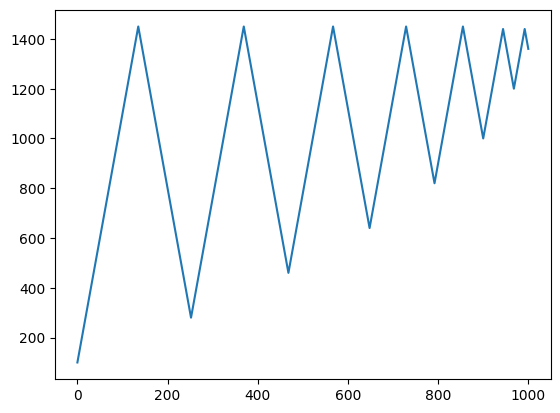

In [120]:
ascending_triangle_slopes = []

for i in range(14):
    if i % 2 == 0:
        for j in range(14 - i + 1):
            ascending_triangle_slopes.append(10)
    else:
        for j in range(14 - i):
            ascending_triangle_slopes.append(-10)

ascending_triangle_pattern = generate_pattern(ascending_triangle_slopes, 100, 1000)
plt.plot(ascending_triangle_pattern)

Descending triangle pattern

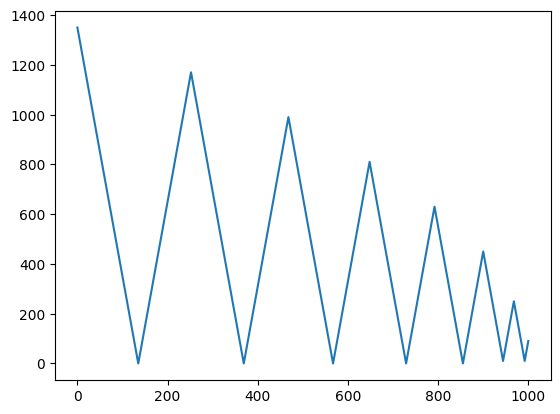

In [121]:
descending_triangle_slopes = []

for i in range(14):
    if i % 2 == 0:
        for j in range(14 - i + 1):
            descending_triangle_slopes.append(-10)
    else:
        for j in range(14 - i):
            descending_triangle_slopes.append(10)

descending_triangle_pattern = generate_pattern(descending_triangle_slopes, 100, 1000)
plt.plot(descending_triangle_pattern)

Let's have all the patterns in a dictionary.

In [122]:
patterns = {
    "linear_increase": linear_increase_pattern,
    "linear_decrease": linear_decrease_pattern,
    "head_and_shoulders": head_and_shoulders_pattern,
    "double_top": double_top_pattern,
    "double_bottom": double_bottom_pattern,
    "triple_top": triple_top_pattern,
    "triple_bottom": triple_bottom_pattern,
    "rounding_bottom": rounding_bottom_pattern,
    "rounding_top": rounding_top_pattern,
    "cup_and_handle": cup_and_handle_pattern,
    "reaching_center_triangle": reaching_center_triangle_pattern,
    "ascending_triangle": ascending_triangle_pattern,
    "descending_triangle": descending_triangle_pattern
}

len(patterns.keys())

13

Let's also add a completely random pattern.

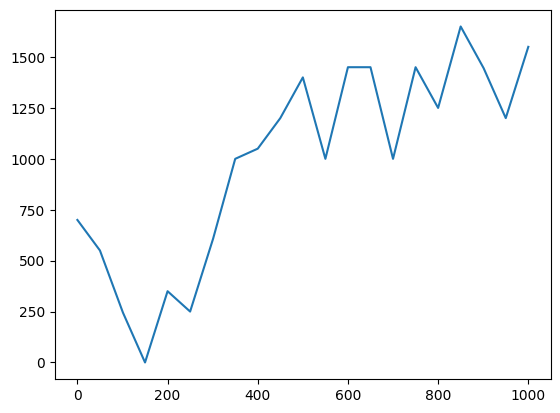

In [123]:
random_slopes = [random.randint(-10, 10) for i in range(20)]
random_pattern = generate_pattern(random_slopes, 100, 1000)
min_value = min(random_pattern)
if min_value < 0:
    random_pattern = [i - min_value for i in random_pattern]
plt.plot(random_pattern)


Let's join all the patterns together and add some noise to the result.

## For each pattern there should be a corresponding investment frequency pattern too. 
**Attention:** the following patterns are just for the sake of simulation and they are not real.
They are purely derived from the past behavior of people and even not as precise as the classical chart patterns.
This is only an assumption that the investment frequency is directly related to the price of the ERC20 token. The past price trends are more important than the old price trends. Therefore, the investment frequency is more related to the recent price trends. To make this into account, we can use the exponential moving average of the price to calculate the investment frequency.


In [124]:
def generate_investment_frequency_pattern(price_pattern: List[int], alpha: float) -> List[int]:
    investment_frequency_pattern = [0]
    for i in range(1, len(price_pattern)):
        investment_frequency_pattern.append(
            alpha * price_pattern[i] + (1 - alpha) * investment_frequency_pattern[i - 1])
    return investment_frequency_pattern

Let's visualize the investment frequency pattern for the triple bottom pattern.

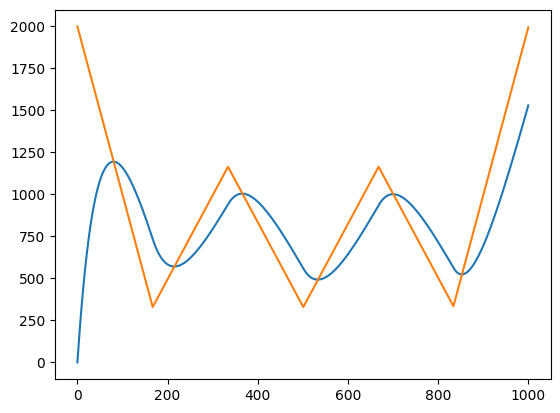

In [125]:
triple_bottom_investment_frequency_pattern = generate_investment_frequency_pattern(triple_bottom_pattern, 0.02)
plt.plot(triple_bottom_investment_frequency_pattern)
# plot the price pattern too
plt.plot(triple_bottom_pattern)

Let's create a dictionary for the patterns and their corresponding list of investment frequencies.

In [126]:
alpha = 0.015
investment_frequency_patterns = {
    "linear_increase": generate_investment_frequency_pattern(linear_increase_pattern, alpha),
    "linear_decrease": generate_investment_frequency_pattern(linear_decrease_pattern, alpha),
    "head_and_shoulders": generate_investment_frequency_pattern(head_and_shoulders_pattern, alpha),
    "double_top": generate_investment_frequency_pattern(double_top_pattern, alpha),
    "double_bottom": generate_investment_frequency_pattern(double_bottom_pattern, alpha),
    "triple_top": generate_investment_frequency_pattern(triple_top_pattern, alpha),
    "triple_bottom": generate_investment_frequency_pattern(triple_bottom_pattern, alpha),
    "rounding_bottom": generate_investment_frequency_pattern(rounding_bottom_pattern, alpha),
    "rounding_top": generate_investment_frequency_pattern(rounding_top_pattern, alpha),
    "cup_and_handle": generate_investment_frequency_pattern(cup_and_handle_pattern, alpha),
    "reaching_center_triangle": generate_investment_frequency_pattern(reaching_center_triangle_pattern, alpha),
    "ascending_triangle": generate_investment_frequency_pattern(ascending_triangle_pattern, alpha),
    "descending_triangle": generate_investment_frequency_pattern(descending_triangle_pattern, alpha),
}

Let's see the patterns and their corresponding investment frequency patterns.

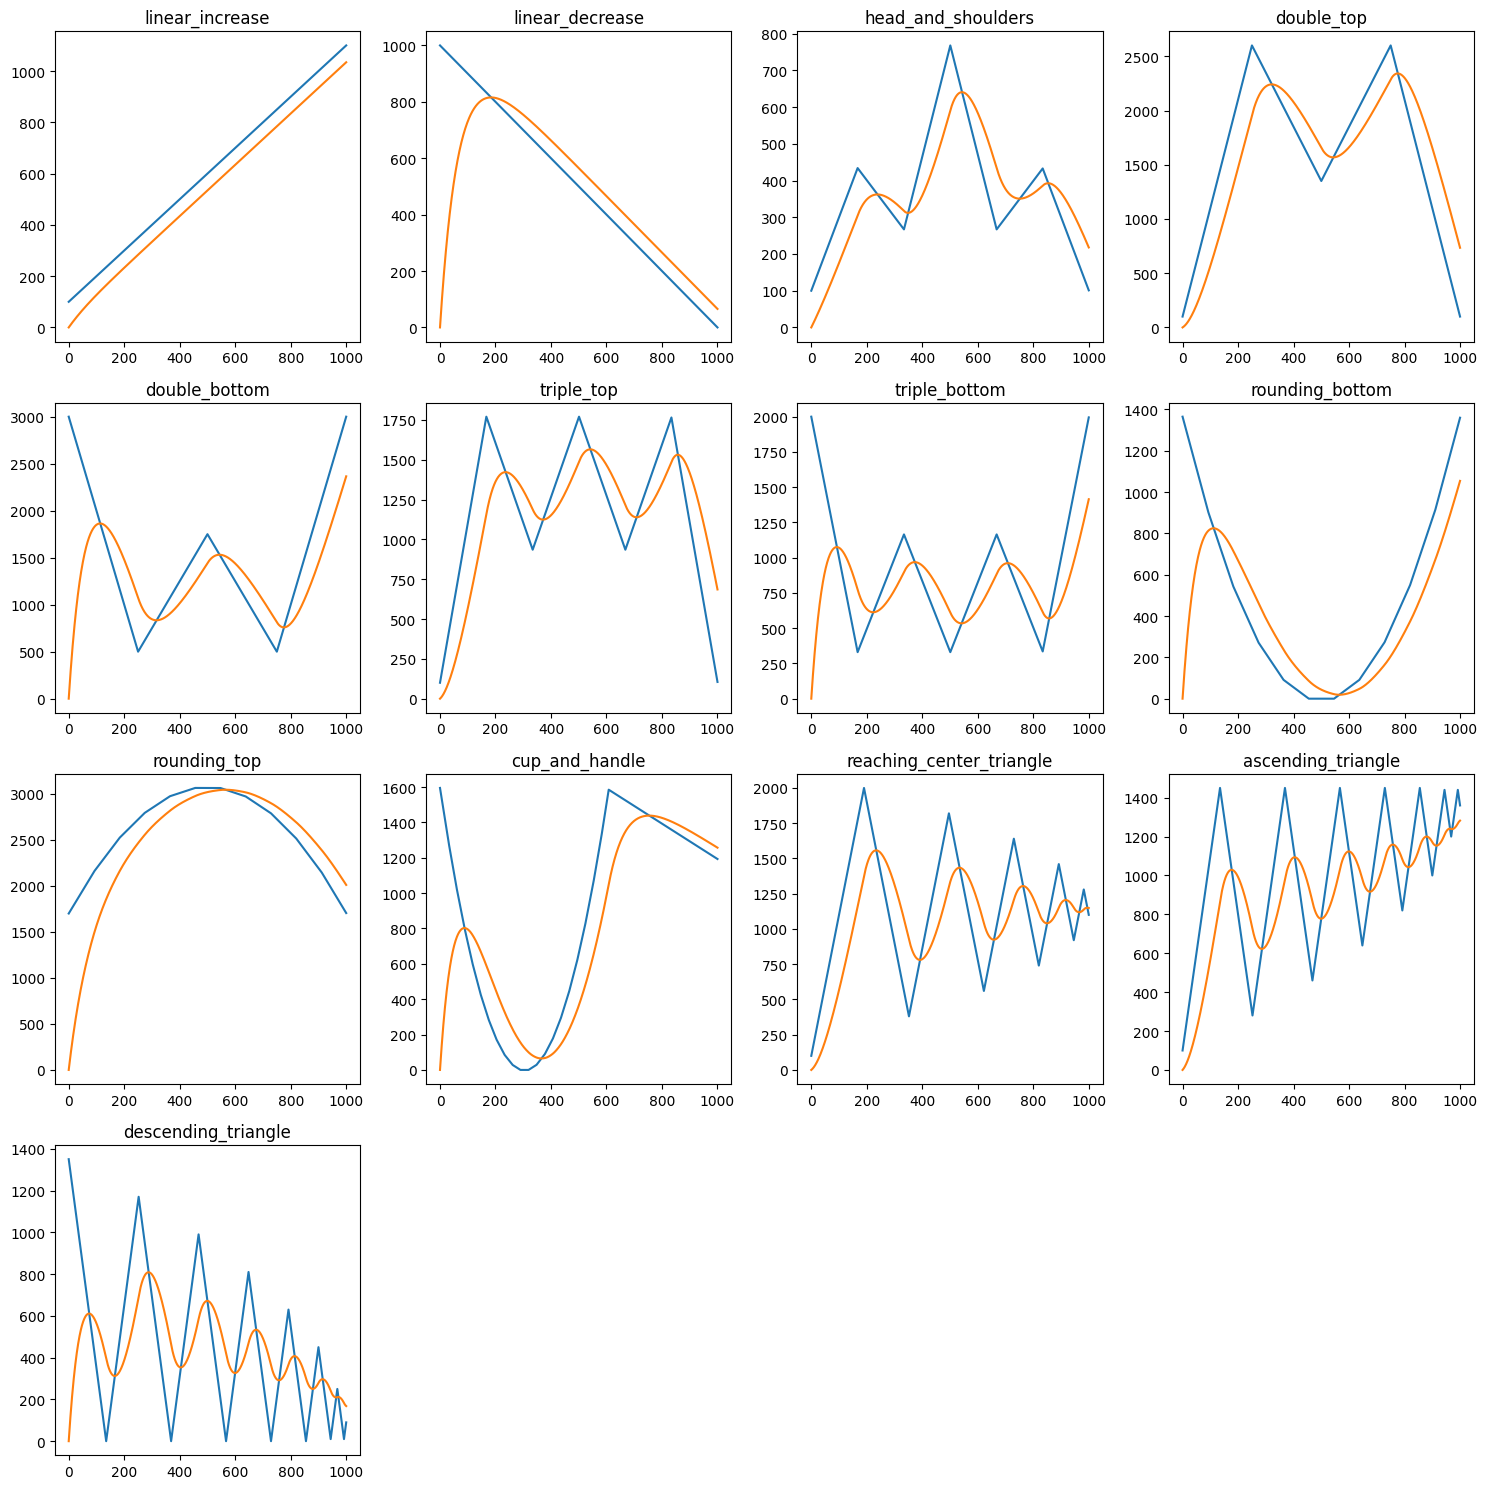

In [127]:
# there are 13 patterns
# let's plot them in 4 rows and 4 columns
# the last row will have only one plot
import matplotlib.pyplot as plt

fig, axs = plt.subplots(4, 4, figsize=(15, 15))

# First 3 rows
for i in range(4):
    for j in range(4):
        if i * 4 + j >= len(patterns.keys()):
            break
        axs[i, j].plot(patterns[list(patterns.keys())[i * 4 + j]])
        axs[i, j].plot(investment_frequency_patterns[list(patterns.keys())[i * 4 + j]])
        axs[i, j].set_title(list(patterns.keys())[i * 4 + j])

# Remove unused subplots
for j in range(1, 4):
    fig.delaxes(axs[3, j])

plt.tight_layout()
plt.show()


It's also good to have some random patterns too.

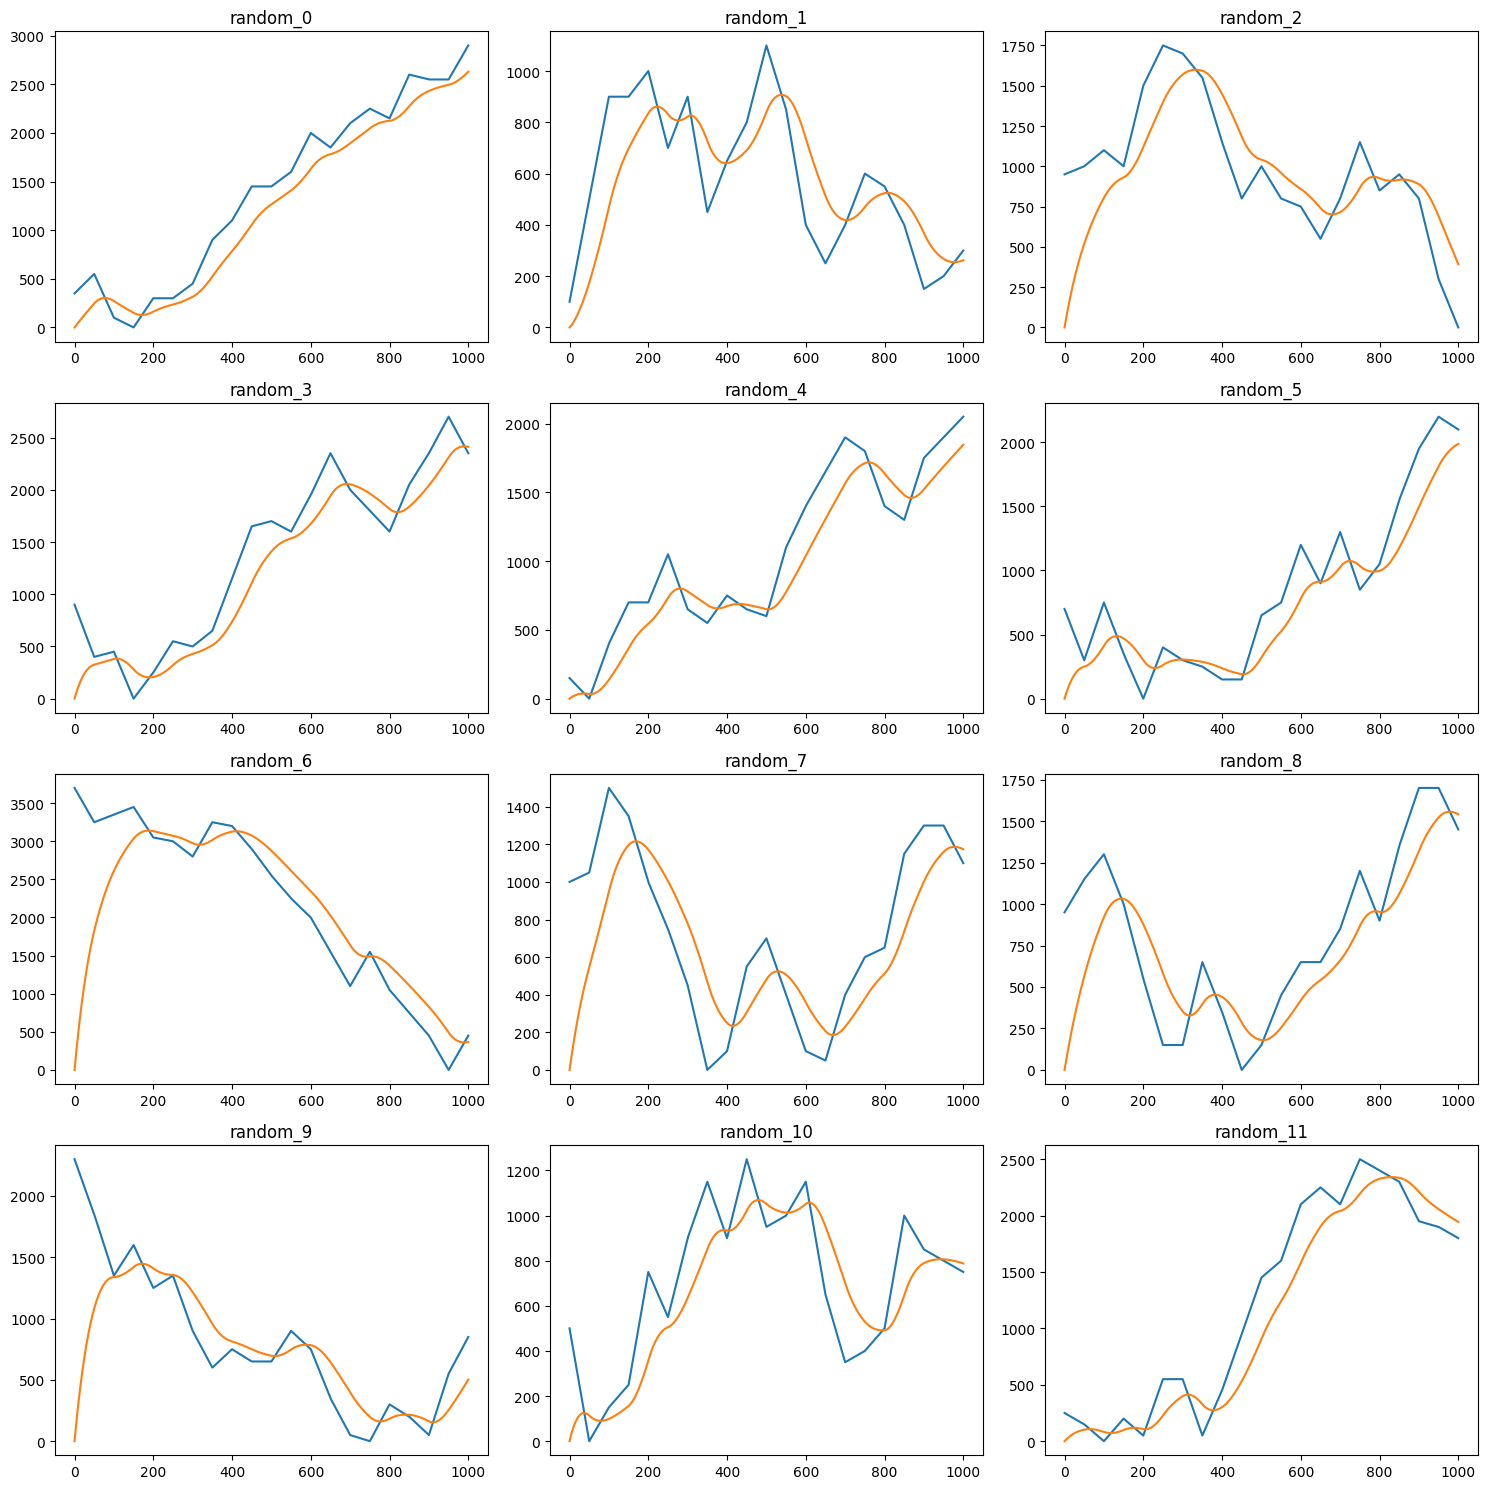

In [128]:
random_patterns = []

for i in range(12):
    random_slopes = [random.randint(-10, 10) for i in range(20)]
    random_pattern = generate_pattern(random_slopes, 100, 1000)
    min_value = min(random_pattern)
    if min_value < 0:
        random_pattern = [i - min_value for i in random_pattern]
    corresponding_investment_frequency_pattern = generate_investment_frequency_pattern(random_pattern, alpha)
    random_patterns.append((random_pattern, corresponding_investment_frequency_pattern))

# let's plot them in 4 rows and 3 columns
fig, axs = plt.subplots(4, 3, figsize=(15, 15))

for i in range(4):
    for j in range(3):
        axs[i, j].plot(random_patterns[i * 3 + j][0])
        axs[i, j].plot(random_patterns[i * 3 + j][1])
        axs[i, j].set_title(f"random_{i * 3 + j}")

# show the plot
plt.tight_layout()
plt.show()

Let's have all the patterns in a dictionary.

In [129]:
all_patterns = {}
for pattern in patterns.keys():
    all_patterns[pattern] = (patterns[pattern], investment_frequency_patterns[pattern])
for i in range(len(random_patterns)):
    all_patterns[f"random_{i}"] = random_patterns[i]

len(all_patterns.keys())

25

Make it all a function.

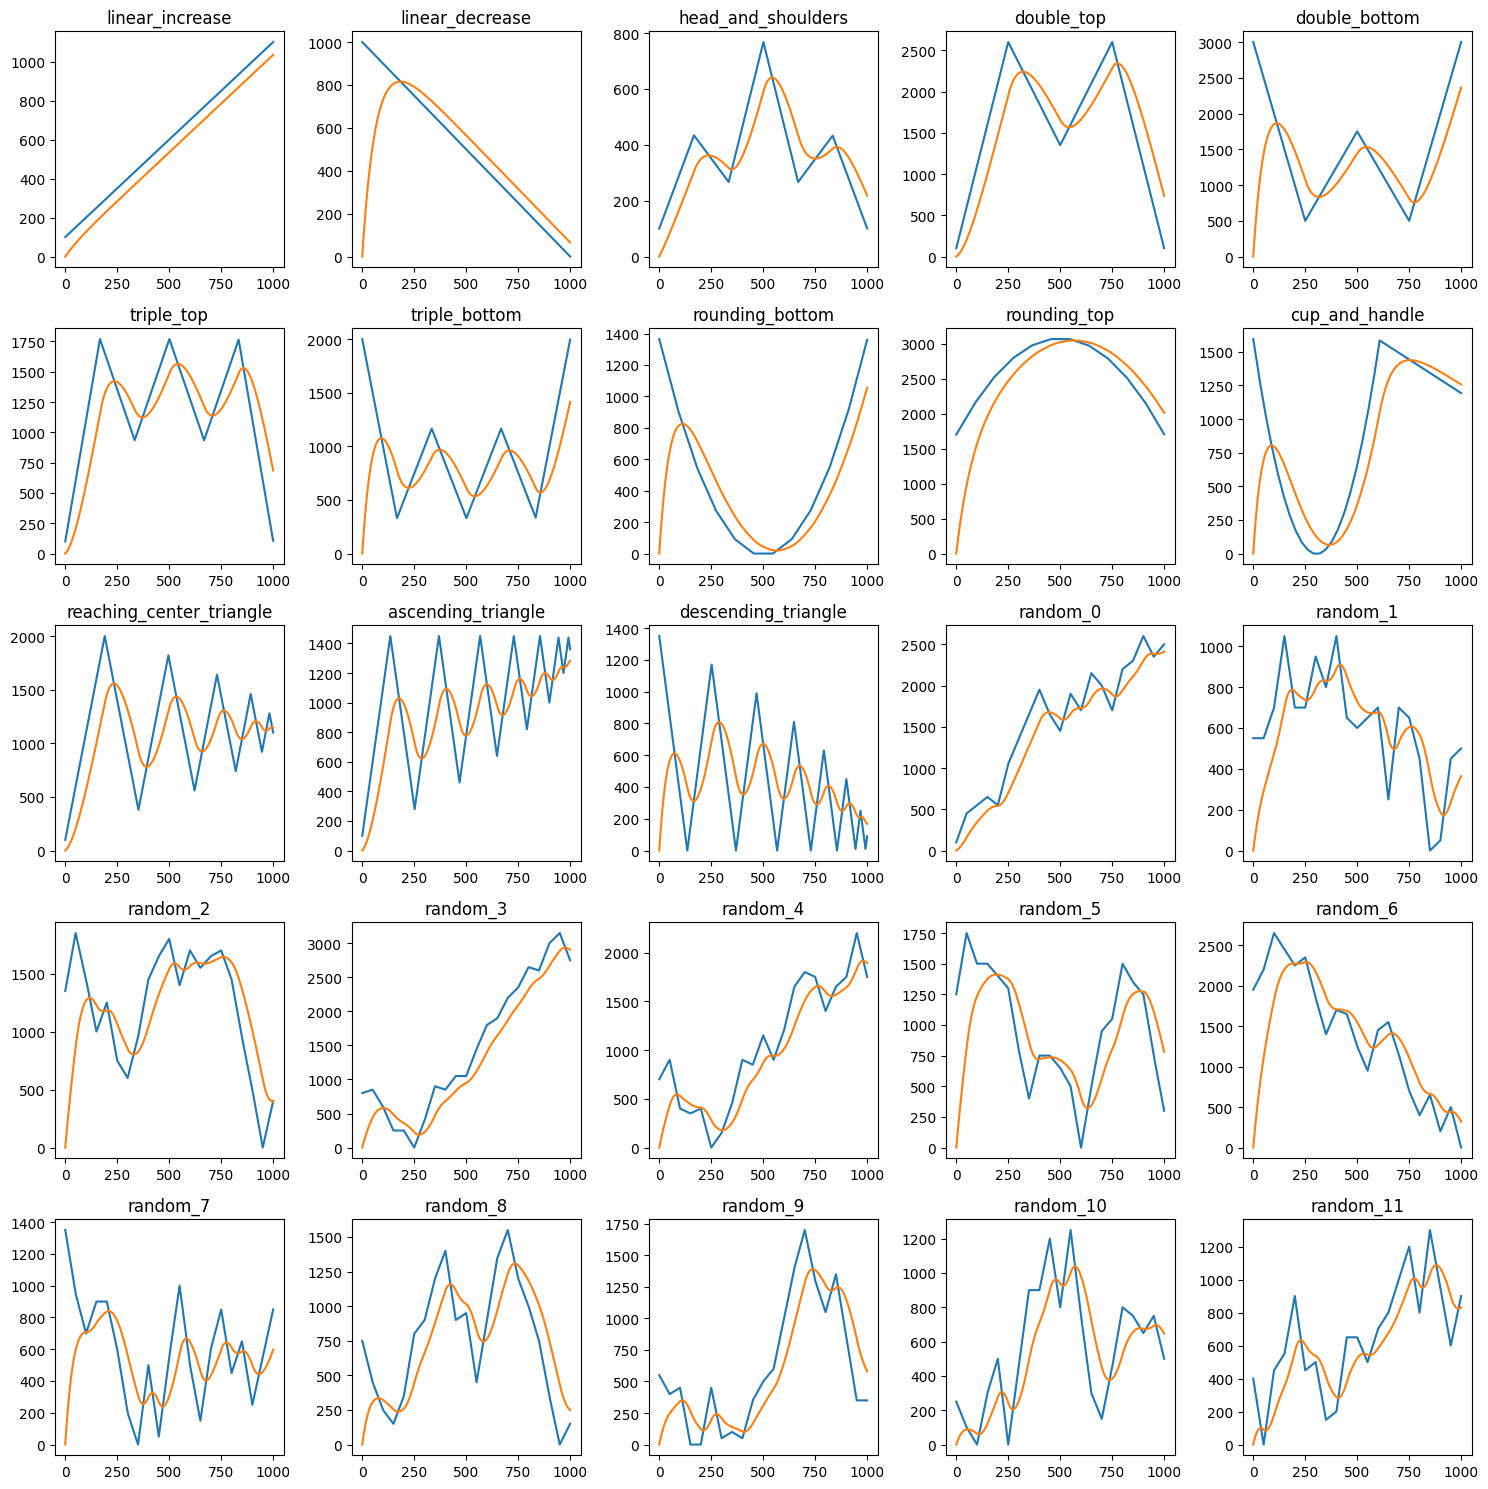

In [130]:
def gen_tests():
    patterns = {}
    linear_increase_pattern = generate_pattern([1], 100, 1000)
    patterns["linear_increase"] = linear_increase_pattern
    linear_decrease_pattern = generate_pattern([-1], 100, 1000)
    patterns["linear_decrease"] = linear_decrease_pattern
    head_and_shoulders_slopes = [2, -1, 3, -3, 1, -2]
    head_and_shoulders_pattern = generate_pattern(head_and_shoulders_slopes, 100, 1000)
    patterns["head_and_shoulders"] = head_and_shoulders_pattern
    double_tap_slopes = [10, -5, 5, -10]
    double_top_pattern = generate_pattern(double_tap_slopes, 100, 1000)
    patterns["double_top"] = double_top_pattern
    double_bottom_slopes = [-10, 5, -5, 10]
    double_bottom_pattern = generate_pattern(double_bottom_slopes, 3000, 1000)
    patterns["double_bottom"] = double_bottom_pattern
    triple_top_slopes = [10, -5, 5, -5, 5, -10]
    triple_top_pattern = generate_pattern(triple_top_slopes, 100, 1000)
    patterns["triple_top"] = triple_top_pattern
    triple_bottom_slopes = [-10, 5, -5, 5, -5, 10]
    triple_bottom_pattern = generate_pattern(triple_bottom_slopes, 2000, 1000)
    patterns["triple_bottom"] = triple_bottom_pattern
    rounding_bottom_slopes = [-5 + i for i in range(11)]
    rounding_bottom_pattern = generate_pattern(rounding_bottom_slopes, 1300, 1000)
    patterns["rounding_bottom"] = rounding_bottom_pattern
    rounding_top_slopes = [5 - i for i in range(11)]
    rounding_top_pattern = generate_pattern(rounding_top_slopes, 1700, 1000)
    patterns["rounding_top"] = rounding_top_pattern
    cup_and_handle_slopes = [-10 + 1 * i for i in range(21)] + [-1 for i in range(14)]
    cup_and_handle_pattern = generate_pattern(cup_and_handle_slopes, 1500, 1000)
    patterns["cup_and_handle"] = cup_and_handle_pattern
    reaching_center_slopes = []
    for i in range(10):
        for j in range(10 - i):
            reaching_center_slopes.append(10 * (-1) ** i)
    reaching_center_triangle_pattern = generate_pattern(reaching_center_slopes, 100, 1000)
    patterns["reaching_center_triangle"] = reaching_center_triangle_pattern
    ascending_triangle_slopes = []
    for i in range(14):
        if i % 2 == 0:
            for j in range(14 - i + 1):
                ascending_triangle_slopes.append(10)
        else:
            for j in range(14 - i):
                ascending_triangle_slopes.append(-10)
    ascending_triangle_pattern = generate_pattern(ascending_triangle_slopes, 100, 1000)
    patterns["ascending_triangle"] = ascending_triangle_pattern
    descending_triangle_slopes = []
    for i in range(14):
        if i % 2 == 0:
            for j in range(14 - i + 1):
                descending_triangle_slopes.append(-10)
        else:
            for j in range(14 - i):
                descending_triangle_slopes.append(10)
    descending_triangle_pattern = generate_pattern(descending_triangle_slopes, 100, 1000)
    patterns["descending_triangle"] = descending_triangle_pattern
    random_patterns = []
    for i in range(12):
        random_slopes = [random.randint(-10, 10) for i in range(20)]
        random_pattern = generate_pattern(random_slopes, 100, 1000)
        min_value = min(random_pattern)
        if min_value < 0:
            random_pattern = [i - min_value for i in random_pattern]
        corresponding_investment_frequency_pattern = generate_investment_frequency_pattern(random_pattern, alpha)
        random_patterns.append((random_pattern, corresponding_investment_frequency_pattern))
    all_patterns = {}
    for pattern in patterns.keys():
        all_patterns[pattern] = (patterns[pattern], generate_investment_frequency_pattern(patterns[pattern], alpha))
    for i in range(len(random_patterns)):
        all_patterns[f"random_{i}"] = random_patterns[i]
    return all_patterns


all_patterns = gen_tests()
# plot them all in a 5x5 grid
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
for i in range(5):
    for j in range(5):
        axs[i, j].plot(all_patterns[list(all_patterns.keys())[i * 5 + j]][0])
        axs[i, j].plot(all_patterns[list(all_patterns.keys())[i * 5 + j]][1])
        axs[i, j].set_title(list(all_patterns.keys())[i * 5 + j])
# show the plot
plt.tight_layout()
plt.show()

Use the patterns in the pools.

In [131]:
class SimulationPool:
    def __init__(self, pattern, initial_frequency=100):
        self.pattern = (pattern[0].copy(), pattern[1].copy())
        self.prices = pattern[0].copy()
        self.average_price = sum(self.prices) / len(self.prices)
        self.price_movement = self.average_price * 0.01
        self.investments = pattern[1].copy()
        self.average_investment = sum(self.investments) / len(self.investments)
        self.investment_movement = self.average_investment * 0.01
        self.current_frequency = 0
        self.frequencies = [initial_frequency]
        self.counter = 0
        self.price_change_threshold = 2
        self.investments_change_threshold_by_price = 2
        self.investments_change_threshold_by_frequency = 5

    def get_frequency_changes(self):
        # get the frequency change over the last 2 iterations
        if self.counter < 2:
            return 0
        else:
            return self.frequencies[self.counter] - self.frequencies[self.counter - 1]

    def get_current_price(self):
        if random.randint(0, 100) < self.price_change_threshold:
            # update price on the frequency of minting
            frequency_changes = self.get_frequency_changes()
            for i in range(self.counter, len(self.prices)):
                price = self.prices[i]
                new_price = price + frequency_changes * self.price_movement
                if new_price < 0:
                    new_price = 0
                self.prices[i] = new_price

        price = self.prices[self.counter]
        return price

    def get_price_changes(self):
        # get the price change over the last 5 iterations
        counter = self.counter
        if counter < 2:
            return 0
        else:
            return self.prices[counter] - self.prices[counter - 1]

    def get_current_investment_frequency(self):
        rand = random.randint(0, 100)
        if rand < self.investments_change_threshold_by_price:
            # update the investment frequency on the change of price
            price_changes = self.get_price_changes()
            for i in range(self.counter, len(self.investments)):
                self.investments[i] += price_changes * self.investment_movement
        elif rand < self.investments_change_threshold_by_frequency:
            # update investment frequency on the frequency of minting
            frequency_changes = self.get_frequency_changes()
            for i in range(self.counter, len(self.investments)):
                self.investments[i] += frequency_changes * self.investment_movement

        investment_frequency = self.investments[self.counter]
        return investment_frequency

    def get_frequency(self):
        return self.frequencies[-1]

    def update_frequencies(self, frequency):
        self.frequencies.append(frequency)

    def step(self):
        self.counter += 1





## The RL method
The method in the mind is to have positive and negative score for different actions.

For the price:

+ Positive score for increase of price
+ Negative score for the decrease of price
For the investment
+ Positive score for the increase of the frequency of investment
+ Negative score for the decrease of the frequency of investment

The model should itself figure out how to find the optimal frequency of minting.
Let's create the environment model.

The following is for actual environment.

In [132]:
class InvestmentPoolEnvironment:
    def __init__(self, pool: Pool):
        self.pool = pool
        self.current_state = None
        self.current_action = None

    def step(self, action):
        # Apply the action (change the frequency of minting)
        self.pool.current_frequency = action
        self.pool.update_withdrawals_amounts()

        # Calculate the reward
        reward = self.calculate_reward()

        # Update the current state
        self.current_state = self.get_state()

        return self.current_state, reward

    def calculate_reward(self):
        # Calculate the reward based on the change in price and investment frequency
        price_reward = self.calculate_price_reward()
        investment_reward = self.calculate_investment_reward()

        price_coefficient = 3
        investment_coefficient = 3

        return price_coefficient * price_reward + investment_coefficient * investment_reward

    def calculate_price_reward(self):
        # Calculate the reward based on the change in price
        if len(self.pool.prices) < 2:
            return 0

        if self.pool.prices[-1] > self.pool.prices[-2]:
            return 1
        elif self.pool.prices[-1] < self.pool.prices[-2]:
            return -1
        else:
            return 0

    def calculate_investment_reward(self):
        # Calculate the reward based on the change in investment frequency
        if len(self.pool.investments) < 2:
            return 0

        if self.pool.investments[-1][0] - self.pool.investments[-2][0] < frequency_time_unit:
            return 1
        else:
            return -1

    def get_state(self):
        # The state is the current price and the current frequency of investment
        current_price = self.pool.get_current_price()
        current_frequency_of_investment = self.pool.calculate_current_frequency()
        return current_price, current_frequency_of_investment

    def get_investment_frequency(self):
        if len(self.pool.investments) == 0:
            return 0
        sum = 0
        for investment in self.pool.investments:
            if datetime.datetime.now() - investment[0] < datetime.timedelta(seconds=frequency_time_unit):
                break
            sum += investment[1].carbon_value
        return sum / frequency_time_unit

    def reset(self):
        # Reset the environment to the initial state
        self.pool = Pool(self.pool.standard, self.pool.carbon_type, self.pool.issuance_year)
        self.current_state = self.get_state()
        self.current_action = None



The following is for simulation environment.

In [133]:
class SimulationEnvironment:
    def __init__(self, all_patterns):
        self.all_patterns = all_patterns
        self.pool_number = 0
        self.pool = SimulationPool(all_patterns[list(all_patterns.keys())[self.pool_number]])
        self.current_state = self.get_state()
        if self.current_state is None:
            print(f'Current state is None')
        self.current_action = None

    def step(self, action):
        # Apply the action (change the frequency of minting)
        f = self.pool.get_frequency()
        new_f = f + action
        self.pool.update_frequencies(new_f)

        self.pool.step()

        # Calculate the reward
        reward = self.calculate_reward()

        # Update the current state
        self.current_state = self.get_state()

        return self.current_state, reward, self.pool.counter == len(self.pool.prices) - 1

    def calculate_reward(self):
        # Calculate the reward based on the change in price and investment frequency
        price_reward = self.calculate_price_reward()
        investment_reward = self.calculate_investment_reward()

        price_coefficient = 3
        investment_coefficient = 2

        return price_coefficient * price_reward + investment_coefficient * investment_reward

    def calculate_price_reward(self):
        counter = self.pool.counter

        # Calculate the reward based on the change in price
        if counter < 2:
            return 0

        if self.pool.prices[counter] == 0:
            return -100

        return self.pool.prices[counter] - self.pool.prices[counter - 1]

    def calculate_investment_reward(self):
        counter = self.pool.counter
        # Calculate the reward based on the change in investment frequency
        if counter < 2:
            return 0

        return self.pool.investments[counter] - self.pool.investments[counter - 1]

    def get_state(self):
        # The state is the current price and the current frequency of investment
        current_price = self.pool.get_current_price()
        current_frequency_of_investment = self.pool.get_current_investment_frequency()
        return current_price, current_frequency_of_investment

    def reset(self):
        # Reset the environment to the initial
        self.pool_number = (self.pool_number + 1) % len(self.all_patterns.keys())
        self.pool = SimulationPool(self.all_patterns[list(self.all_patterns.keys())[self.pool_number]])
        self.current_state = self.get_state()
        self.current_action = None
        return self.current_state


Let's create a DQNModel. The model will have the following properties:
1. **input_size**: The size of the input layer.
2. **output_size**: The size of the output layer.
3. **2 hidden layers**: There are two hidden fully connected layers that have 32 neurons each.



Let's import the required libraries.

In [134]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
from collections import deque


Let's create the DQN model.

In [135]:
class DQN(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x


Let's create the agent.

Let's go for epsilon decay exploration and exploitation first.

In [136]:
class DQNAgent:
    def __init__(self, input_size, output_value, learning_rate=0.001, epsilon=1.0, epsilon_decay=0.9995,
                 epsilon_min=0.01, memory_size=1000000, batch_size=64):
        self.input_size = input_size
        self.output_size = output_value * 2 + 1
        self.output_value = output_value
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.memory_size = memory_size
        self.batch_size = batch_size
        self.memory = deque(maxlen=self.memory_size)
        self.model = DQN(self.input_size, self.output_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.loss = nn.MSELoss()
        self.last_reward = None
        self.goods = 0
        self.bads = 0

    def act(self, state):
        if self.epsilon <= self.epsilon_min:
            theta = np.random.beta(self.goods + 1, self.bads + 1)
            if 0.1 > theta:
                with torch.no_grad():
                    state = torch.tensor(state, dtype=torch.float).view(-1, self.input_size)
                    res = torch.argmax(self.model(state)).item() - self.output_value
                    return res
            else:
                return random.randint(self.output_value * -1, self.output_value)
        else:
            if np.random.rand() <= self.epsilon:
                return random.randint(self.output_value * -1, self.output_value)
            else:
                with torch.no_grad():
                    state = torch.tensor(state, dtype=torch.float).view(-1, self.input_size)
                    res = torch.argmax(self.model(state)).item() - self.output_value
                    return res

    def remember(self, state, action, reward, next_state, done):
        if self.last_reward is not None:
            if reward > self.last_reward:
                self.goods += 1
            else:
                self.bads += 1
        self.memory.append((state, action, reward, next_state, done))
        self.last_reward = reward

    def replay(self):
        if len(self.memory) - 1 < self.batch_size:
            return

        batch = list(self.memory)
        batch.pop(0)
        batch = random.sample(batch, self.batch_size)
        states = torch.tensor([i[0] for i in batch], dtype=torch.float).view(-1, self.input_size)
        actions = torch.tensor([i[1] + self.output_value for i in batch], dtype=torch.long).view(-1, 1)
        rewards = torch.tensor([i[2] for i in batch], dtype=torch.float).view(-1, 1)
        next_states = torch.tensor([i[3] for i in batch], dtype=torch.float).view(-1, self.input_size)

        q_values = self.model(states).gather(1, actions)
        next_q_values = self.model(next_states).max(1)[0].view(-1, 1)
        target_q_values = rewards + next_q_values
        loss = self.loss(q_values, target_q_values)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.memory = deque(maxlen=self.memory_size)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay


Do the training.

In [137]:
import time
from tqdm import tqdm
def train_agent(agent: DQNAgent, environment: SimulationEnvironment, episodes: int):
    for episode in tqdm(range(episodes)):
        state = environment.reset()
        done = False
        counter = 0
        while not done:
            action = agent.act(state)
            next_state, reward, done = environment.step(action)
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            agent.replay()
            counter += 1



In [138]:
all_patterns = gen_tests()
environment = SimulationEnvironment(all_patterns)
dqn_agent = DQNAgent(2, 10)
start = time.time()
train_agent(dqn_agent, environment, 2000)
end = time.time()
print(f'Time: {end - start}')

100%|██████████| 2000/2000 [00:48<00:00, 41.57it/s]

Time: 48.10773420333862


In [158]:
def total_rewards(agent):
    all_patterns = gen_tests()
    environment = SimulationEnvironment(all_patterns)
    total_rewards = 0
    for episode in range(len(all_patterns.keys())):
        state = environment.reset()
        done = False
        counter = 0
        while not done:
            action = agent.act(state)
            next_state, reward, done = environment.step(action)
            state = next_state
            total_rewards += reward
            counter += 1
    return total_rewards

def mean_rewards(agent, count):
    rewards = []
    for i in range(count):
        rewards.append(total_rewards(agent))
    return sum(rewards) / len(rewards)
    

DQNAgent_rewards = mean_rewards(dqn_agent, 200)
print(f'DQN Agent Rewards: {DQNAgent_rewards}')

DQN Agent Rewards: 28328.062903721406


In [164]:
def random_agent_rewards():
    environment = SimulationEnvironment(all_patterns)
    total_rewards = 0
    for episode in range(len(all_patterns.keys())):
        state = environment.reset()
        done = False
        counter = 0
        while not done:
            action = random.randint(-10, 10)
            next_state, reward, done = environment.step(action)
            state = next_state
            total_rewards += reward
            counter += 1
    return total_rewards

def mean_rewards_random(count):
    rewards = []
    for i in tqdm(range(count)):
        rewards.append(random_agent_rewards())
    return sum(rewards) / len(rewards)

ra_rewards = mean_rewards_random(200)
print(f'Random Agent Rewards: {ra_rewards}')

Random Agent Rewards: 10981.15778705092


Do it with SARSA.

In [165]:
class SARSAAgent:
    def __init__(self, input_size, output_value, learning_rate=0.001, epsilon=1.0, epsilon_decay=0.9995,
                 epsilon_min=0.01, memory_size=1000000, batch_size=64):
        self.input_size = input_size
        self.output_size = output_value * 2 + 1
        self.output_value = output_value
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.memory_size = memory_size
        self.batch_size = batch_size
        self.memory = deque(maxlen=self.memory_size)
        self.model = DQN(self.input_size, self.output_size)
        self.optimizer = optim.Adam(self.model.parameters(), lr=self.learning_rate)
        self.loss = nn.MSELoss()
        self.last_reward = None
        self.goods = 0
        self.bads = 0

    def act(self, state):
        if self.epsilon <= self.epsilon_min:
            theta = np.random.beta(self.goods + 1, self.bads + 1)
            if 0.1 > theta:
                with torch.no_grad():
                    state = torch.tensor(state, dtype=torch.float).view(-1, self.input_size)
                    res = torch.argmax(self.model(state)).item() - self.output_value
                    return res
            else:
                return random.randint(self.output_value * -1, self.output_value)
        else:
            if np.random.rand() <= self.epsilon:
                return random.randint(self.output_value * -1, self.output_value)
            else:
                with torch.no_grad():
                    state = torch.tensor(state, dtype=torch.float).view(-1, self.input_size)
                    res = torch.argmax(self.model(state)).item() - self.output_value
                    return res

    def remember(self, state, action, reward, next_state, done):
        if self.last_reward is not None:
            if reward > self.last_reward:
                self.goods += 1
            else:
                self.bads += 1
        self.memory.append((state, action, reward, next_state, done))
        self.last_reward = reward

    def replay(self):
        if len(self.memory) < 2:
            return

        batch = list(self.memory)
        batch.pop(0)
        batch = random.sample(batch, min(len(batch), self.batch_size))
        states = torch.tensor([i[0] for i in batch], dtype=torch.float).view(-1, self.input_size)
        actions = torch.tensor([i[1] + self.output_value for i in batch], dtype=torch.long).view(-1, 1)
        rewards = torch.tensor([i[2] for i in batch], dtype=torch.float).view(-1, 1)
        next_states = torch.tensor([i[3] for i in batch], dtype=torch.float).view(-1, self.input_size)
        dones = torch.tensor([i[4] for i in batch], dtype=torch.float).view(-1, 1)

        q_values = self.model(states).gather(1, actions)
        next_actions = self.model(next_states).max(1)[1].view(-1, 1)
        next_q_values = self.model(next_states).gather(1, next_actions)
        target_q_values = rewards + (1 - dones) * next_q_values
        loss = self.loss(q_values, target_q_values.detach())
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.memory = deque(maxlen=self.memory_size)

        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay




Do the training.

In [82]:
def train_agent(agent: SARSAAgent, environment: SimulationEnvironment, episodes: int):
    for episode in tqdm(range(episodes)):
        state = environment.reset()
        done = False
        counter = 0
        while not done:
            action = agent.act(state)
            next_state, reward, done = environment.step(action)
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            agent.replay()
            counter += 1


all_patterns = gen_tests()
environment = SimulationEnvironment(all_patterns)
sarsa_agent = SARSAAgent(2, 10)
start = time.time()
train_agent(sarsa_agent, environment, 2000)
end = time.time()
print(f'Time: {end - start}')

100%|██████████| 2000/2000 [07:33<00:00,  4.41it/s]

Time: 453.0973138809204


Get the rewards.

In [187]:
SARSAAgent_rewards = mean_rewards(sarsa_agent, 200)
print(f'SARSA Agent Rewards: {SARSAAgent_rewards}')

SARSA Agent Rewards: 25753.4734386721


# Change of the environment definition so that there would be a better reward.
Let's change the problem definition so that a state indicates the changes in the price and the investment frequency.
Changes will not be the exact values but there will be ranges of changes. The ranges will be from -10 to 10.

In [216]:
class DiscretizedSimulationPool:
    def __init__(self, pattern, initial_frequency=100):
        self.pattern = (pattern[0].copy(), pattern[1].copy())
        self.prices = pattern[0].copy()
        self.average_price = sum(self.prices) / len(self.prices)
        self.price_movement = self.average_price * 0.01
        self.investments = pattern[1].copy()
        self.average_investment = sum(self.investments) / len(self.investments)
        self.investment_movement = self.average_investment * 0.01
        self.current_frequency = 0
        self.frequencies = [initial_frequency]
        self.counter = 0
        self.price_change_threshold = 2
        self.investments_change_threshold_by_price = 2
        self.investments_change_threshold_by_frequency = 5

    def get_frequency_changes(self):
        # get the frequency change over the last 2 iterations
        if self.counter < 2:
            return 0
        else:
            return self.frequencies[self.counter] - self.frequencies[self.counter - 1]

    def update_price(self):
        if random.randint(0, 100) < self.price_change_threshold:
            # update price on the frequency of minting
            frequency_changes = self.get_frequency_changes()
            for i in range(self.counter, len(self.prices)):
                price = self.prices[i]
                new_price = price + frequency_changes * self.price_movement
                if new_price < 0:
                    new_price = 0
                self.prices[i] = new_price

    def update_investment_frequency(self):
        counter = self.counter
        rand = random.randint(0, 100)
        if rand < self.investments_change_threshold_by_price:
            # update the investment frequency on the change of price
            if counter < 2:
                return
            price_changes = self.prices[counter] - self.prices[counter - 1]
            for i in range(counter, len(self.investments)):
                self.investments[i] += price_changes * self.investment_movement
        elif rand < self.investments_change_threshold_by_frequency:
            # update investment frequency on the frequency of minting
            frequency_changes = self.get_frequency_changes()
            for i in range(counter, len(self.investments)):
                self.investments[i] += frequency_changes * self.investment_movement
                
    def calculate_changes(self, data_list):
        counter = self.counter
        # Calculate the changes based on the data_list
        if counter < 2:
            return 0

        # get the average of the data until now (counter)
        avg = sum(data_list[:counter]) / counter

        # get the data change over the last 2 iterations
        changes = data_list[counter] - data_list[counter - 1]

        # get the relation between the changes and the average
        rel = changes / avg * 1000
        rel = int(rel)

        # return the discretized value
        return max(-10, min(10, rel))

    def get_investment_frequency_changes(self):
        return self.calculate_changes(self.investments)

    def get_price_changes(self):
        return self.calculate_changes(self.prices)

    def get_frequency(self):
        return self.frequencies[-1]

    def update_frequencies(self, frequency):
        self.frequencies.append(frequency)

    def step(self):
        self.update_price()
        self.update_investment_frequency()
        self.counter += 1


class DiscretizedSimulationEnvironment:
    def __init__(self, all_patterns):
        self.all_patterns = all_patterns
        self.pool_number = 0
        self.pool = DiscretizedSimulationPool(all_patterns[list(all_patterns.keys())[self.pool_number]])
        self.current_state = self.get_state()
        if self.current_state is None:
            print(f'Current state is None')
        self.current_action = None

    def step(self, action):
        # Apply the action (change the frequency of minting)
        f = self.pool.get_frequency()
        new_f = f + action
        self.pool.update_frequencies(new_f)

        self.pool.step()

        # Calculate the reward
        reward = self.calculate_reward()

        # Update the current state
        self.current_state = self.get_state()

        return self.current_state, reward, self.pool.counter == len(self.pool.prices) - 1

    def calculate_reward(self):
        # Calculate the reward based on the change in price and investment frequency
        price_reward = self.calculate_price_reward()
        investment_reward = self.calculate_investment_reward()

        price_coefficient = 3
        investment_coefficient = 2

        return price_coefficient * price_reward + investment_coefficient * investment_reward

    def calculate_second_derivative_reward(self, data_list):
        counter = self.pool.counter
        # Calculate the reward based on the second derivative in data_list
        if counter < 3:
            return 0

        # last change
        last_change = data_list[counter] - data_list[counter - 1]

        # second last change
        second_last_change = data_list[counter - 1] - data_list[counter - 2]
        
        # second derivative
        second_derivative = last_change - second_last_change

        # return the discretized value
        return max(-10, min(10, int(second_derivative * 1000)))
    

    def calculate_price_reward(self):
        return self.calculate_second_derivative_reward(self.pool.prices) * 10 + self.pool.get_price_changes()

    def calculate_investment_reward(self):
        return self.calculate_second_derivative_reward(self.pool.investments) * 10 + self.pool.get_investment_frequency_changes()

    def get_state(self):
        return self.pool.get_price_changes(), self.pool.get_investment_frequency_changes()

    def reset(self):
        # Reset the environment to the initial
        self.pool_number = (self.pool_number + 1) % len(self.all_patterns.keys())
        self.pool = DiscretizedSimulationPool(self.all_patterns[list(self.all_patterns.keys())[self.pool_number]])
        self.current_state = self.get_state()
        self.current_action = None
        return self.current_state


Let's create the agent. Then train it and evaluate it.

In [217]:
# the dqn agent will be same as the previous one
all_patterns = gen_tests()
environment = DiscretizedSimulationEnvironment(all_patterns)
dqn_agent_de = DQNAgent(2, 10)
start = time.time()
train_agent(dqn_agent_de, environment, 2000)
end = time.time()
print(f'Time: {end - start}')

100%|██████████| 2000/2000 [01:34<00:00, 21.15it/s]

Time: 94.55926990509033


In [201]:
DQNAgent_rewards_de = mean_rewards(dqn_agent_de, 200)
print(f'DQN Agent Rewards: {DQNAgent_rewards_de}')

DQN Agent Rewards: 18130.148950201994


Do it all with SARSA.

In [202]:
all_patterns = gen_tests()
environment = DiscretizedSimulationEnvironment(all_patterns)
sarsa_agent_de = SARSAAgent(2, 10)
start = time.time()
train_agent(sarsa_agent_de, environment, 2000)
end = time.time()
print(f'Time: {end - start}')

100%|██████████| 2000/2000 [09:07<00:00,  3.65it/s]

Time: 547.2608823776245


In [215]:
SARSAAgent_rewards_de = mean_rewards(sarsa_agent_de, 200)
print(f'SARSA Agent Rewards: {SARSAAgent_rewards_de}')

SARSA Agent Rewards: 15104.216478971162
